Контекст

Этот набор данных включает в себя результаты A/B-тестирования Cookie Cats, чтобы выяснить, что происходит, когда первые ворота в игре были перемещены с уровня 30 на уровень 40. Когда игрок устанавливал игру, он или она были случайным образом назначены либо в gate_30, либо в gate_40.

Содержание

Данные, которые у нас есть, от 90 189 игроков, которые установили игру во время запуска AB-теста. Переменные:

userid: уникальный номер, который идентифицирует каждого игрока.
версия: был ли игрок поместин в контрольную группу (gate_30 - ворота на уровне 30) или в группу с перемещенными воротами (gate_40 - ворота на уровне 40).
sum_gamerounds: количество игровых раундов, сыгранных игроком в течение первых 14 дней после установки.
retention_1: Игрок вернулся и играл через 1 день после установки?
retention_7: Игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, он или она были случайным образом назначены на любой из них.

Цель: проанализировать результаты А/Б теста и напишить свои рекомендации менеджеру.

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import kstest

In [ ]:
data = pd.read_csv('AB cookie_cats.csv')
data.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [ ]:
data.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [ ]:
data.nlargest(5, ['sum_gamerounds'])

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,0,1
7912,871500,gate_30,2961,1,1
29417,3271615,gate_40,2640,1,0
43671,4832608,gate_30,2438,1,1
48188,5346171,gate_40,2294,1,1


In [ ]:
# мы видим, что сумма игровых раундов в основном < 3000, поэтому уберем выбросы
data = data[data.sum_gamerounds < 3000]

In [ ]:
data.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018800e+04,90188.000000,90188.000000,90188.000000
mean,4.998397e+06,51.320253,0.445214,0.186056
std,2.883298e+06,102.682719,0.496992,0.389154
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512211e+06,5.000000,0.000000,0.000000
50%,4.995804e+06,16.000000,0.000000,0.000000
75%,7.496461e+06,51.000000,1.000000,0.000000
max,9.999861e+06,2961.000000,1.000000,1.000000


In [ ]:
#Сравним версии gate_30 и gate_40.
A = data.version.groupby(data.version == 'gate_30').count()
B = data.version.groupby(data.version == 'gate_40').count()
print(f'gate_30 {A}')
print(f'gate_40 {B}')

gate_30 version
False    45489
True     44699
Name: version, dtype: int64
gate_40 version
False    44699
True     45489
Name: version, dtype: int64


In [ ]:
mannwhitneyu(data[data.version == 'gate_30'].sum_gamerounds,
             data[data.version == 'gate_40'].sum_gamerounds)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

pvalue очень блиско к 0.05 соответственно этого теста будит не достаточно для принятия решения.

In [ ]:
ttest_ind(data[data.version == 'gate_30'].sum_gamerounds,
          data[data.version == 'gate_40'].sum_gamerounds)

TtestResult(statistic=0.0633675766982082, pvalue=0.9494739458256001, df=90186.0)

In [ ]:
print(kstest(data['sum_gamerounds'][data.version == 'gate_30'], 'norm'))
print(kstest(data['sum_gamerounds'][data.version == 'gate_40'], 'norm'))

KstestResult(statistic=0.8724153079945488, pvalue=0.0, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.8707186187388001, pvalue=0.0, statistic_location=2, statistic_sign=-1)


Распределение не нормальное

Text(0.5, 1.0, 'Number of game rounds players on the first week')

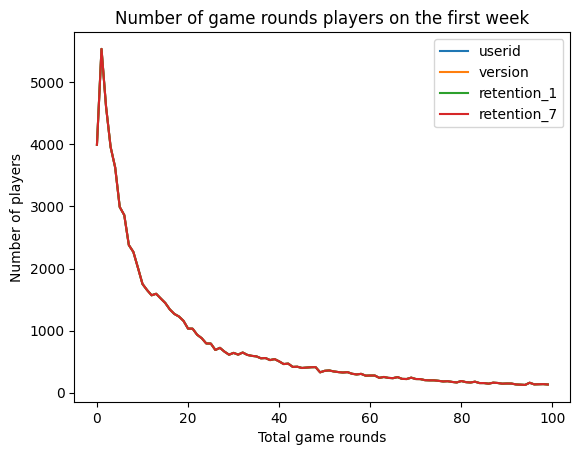

In [ ]:
# Найдем сколько пользователь играет
plot_df = data.groupby('sum_gamerounds').count()

ax = plot_df[:100].plot()
ax.set_xlabel('Total game rounds')
ax.set_ylabel('Number of players')
ax.set_title('Number of game rounds players on the first week')

График показывает, что большенство пользователей играет менее 20 раундов.


In [ ]:
# Посмотрим какое удержание в течении 1 дня для групп
oneday = data.retention_1.groupby(data.version).sum()/data.retention_1.groupby(data.version).count()
print(oneday*100)

version
gate_30    44.819795
gate_40    44.228275
Name: retention_1, dtype: float64


In [ ]:
# Посмотрим какое удержание в течении 7 дней для групп
oneday = data.retention_7.groupby(data.version).sum()/data.retention_7.groupby(data.version).count()
print(oneday*100)

version
gate_30    19.018323
gate_40    18.200004
Name: retention_7, dtype: float64


Незнечительная разница наблюдается лишь в удержании в течении 7 дней. Больше пользователей удерживалось в первой группе

In [ ]:
# Рассмотрим данные более детально
boot_1d = []
for i in range(500):
  boot_mean = data.retention_1.sample(frac=1, replace=True).groupby(data.version).mean()
  boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)
print(boot_1d)

version       gate_30   gate_40
retention_1  0.450922  0.440562
retention_1  0.450379  0.443132
retention_1  0.448406  0.442400
retention_1  0.447711  0.442978
retention_1  0.444331  0.441543
...               ...       ...
retention_1  0.448335  0.446805
retention_1  0.451377  0.445547
retention_1  0.449352  0.444196
retention_1  0.446741  0.445603
retention_1  0.446498  0.442129

[500 rows x 2 columns]


Text(0.5, 0, 'The average of 1-day retention')

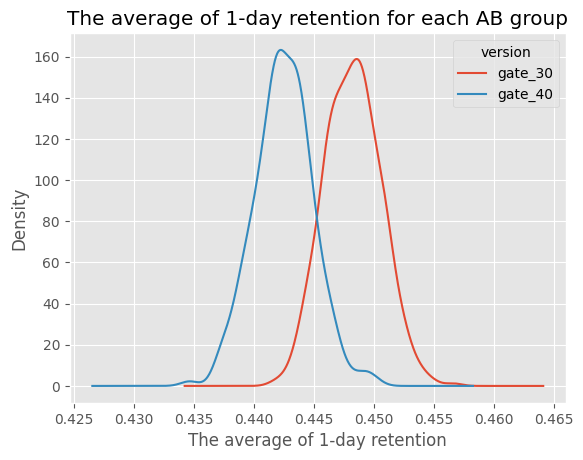

In [ ]:
ax = boot_1d.plot.kde()
ax.set_title('The average of 1-day retention for each AB group')
ax.set_xlabel('The average of 1-day retention')

Text(0.5, 1.0, 'Zooming % difference')

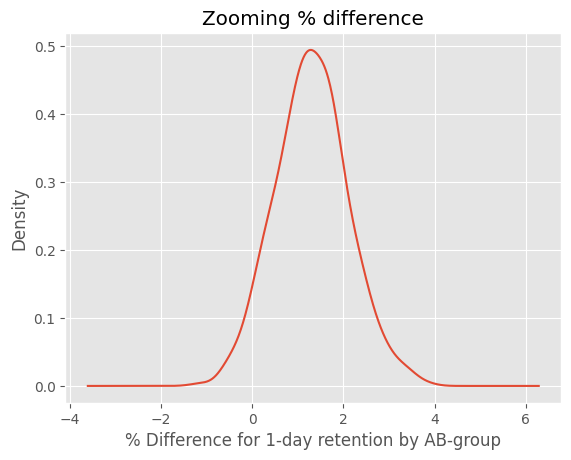

In [ ]:
# Увеличим разницу в удержании в течение 1 дня.
boot_1d['difference'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40']*100

ax = boot_1d['difference'].plot.kde()
ax.set_xlabel('% Difference for 1-day retention by AB-group')
ax.set_title('Zooming % difference')

In [ ]:
# Посчитаем в скольки процентах случаев разница больше 0.
prob = (boot_1d['difference'] > 0).sum() / len(boot_1d['difference'])
print(str(prob*100)+'%')

95.6%


Существует высокая вероятность того, что удержание в течении 1 дня лучше в 1-й руппе

Сделаем все то же самое для анализа удерживания на 7-й день

In [ ]:
boot_7d = []
for i in range(500):
  boot_mean = data.retention_7.sample(frac=1, replace=True).groupby(data.version).mean()
  boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)
print(boot_7d.head())

boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

version       gate_30   gate_40
retention_7  0.190189  0.180353
retention_7  0.190224  0.182873
retention_7  0.192369  0.181055
retention_7  0.188499  0.179029
retention_7  0.188030  0.182018


0.998


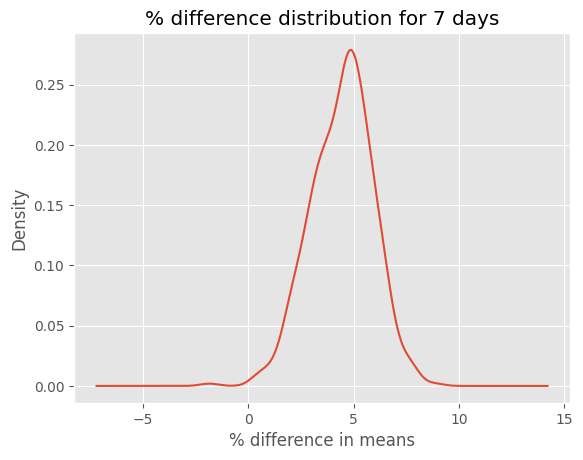

In [ ]:
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel('% difference in means')
ax.set_title('% difference distribution for 7 days')

prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])

print(prob)

In [ ]:
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])
print(str(prob*100)+'%')

99.8%


Вывод: исследования показали, что в группе gate_30 пользователей удерживалось больше как на 1-й день, так и на 7-й день. Для удержания аудитории не рекомендуется применять изменения группы gate_40